# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [2]:
! pip install xgboost

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [41]:
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import numpy as np
import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.filterwarnings(action='ignore')

## 파이썬 기반 XGBoost

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .2, random_state = 123)
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [10]:
params = {
    'max_depth' : 3,
    'eta' : .1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
}
num_rounds = 400

In [11]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	train-logloss:0.13270	eval-logloss:0.15443
[18]	train-logloss:0.12326	eval-logloss:0.14913
[19]	train-logloss:0.11591	eval-logloss:0.14175
[20]	train-logloss:0.10884	eval-logloss:0.13378
[2

In [19]:
predicts = xgb_model.predict(dtest)
print(np.round(predict[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [20]:
preds = [1 if x > .5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [21]:
print('정확도 : {}'.format(accuracy_score(y_test, preds)))
print('정밀도 : {}'.format(precision_score(y_test, preds)))
print('재현율 : {}'.format(recall_score(y_test, preds)))

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


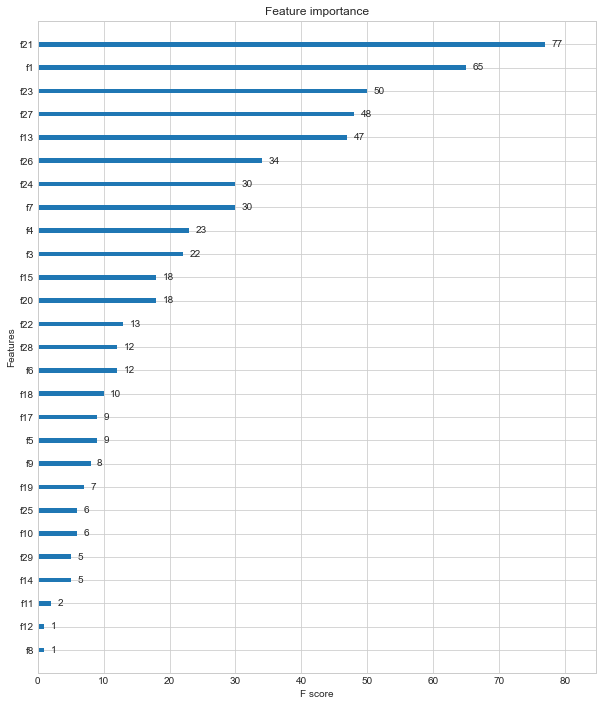

In [22]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax);

## XGBClassifier

### 유방암 데이터

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .2, random_state = 123)

In [51]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=.1, max_depth=3, objective='binary:logistic')
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

[21:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
cross_val = cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/-){}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std))
print('avg score time : {} (+/-){}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std))
print('avg test score : {} (+/-){}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std))

[21:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

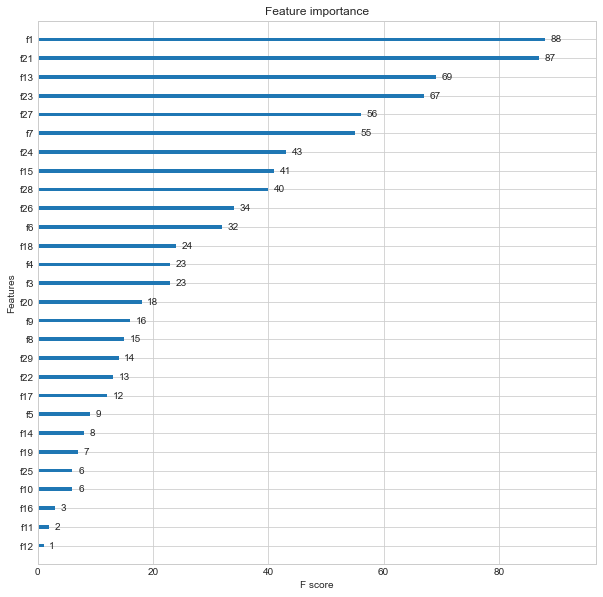

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbc, ax=ax);

## XGBRegressor

### 보스턴 데이터

In [47]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = .2, random_state = 123)

In [49]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [50]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/-){}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std))
print('avg score time : {} (+/-){}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std))
print('avg test score : {} (+/-){}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std))

avg fit time : 0.4353960037231445 (+/-)<built-in method std of numpy.ndarray object at 0x00000203EC6FF390>
avg score time : 0.004776906967163086 (+/-)<built-in method std of numpy.ndarray object at 0x00000203EC6FF3F0>
avg test score : 0.6884390736705599 (+/-)<built-in method std of numpy.ndarray object at 0x00000203EC259390>


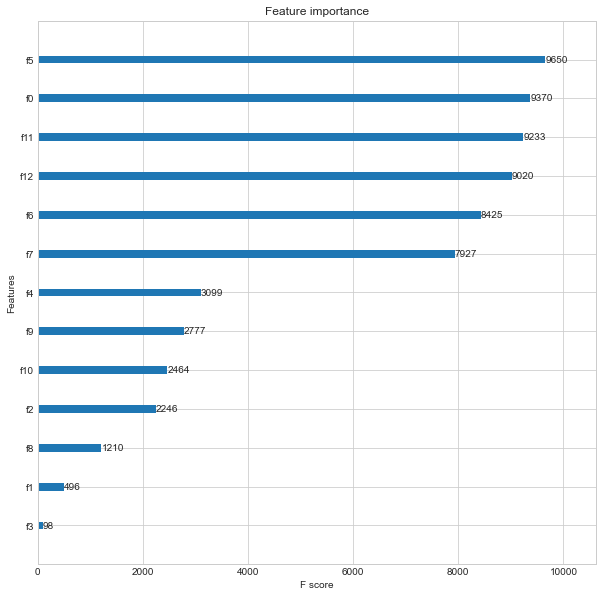

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbc, ax=ax);

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [55]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 유방암 데이터

In [57]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2)

In [64]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's binary_logloss: 0.58514
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.524148
[3]	valid_0's binary_logloss: 0.475715
[4]	valid_0's binary_logloss: 0.432475
[5]	valid_0's binary_logloss: 0.396465
[6]	valid_0's binary_logloss: 0.367996
[7]	valid_0's binary_logloss: 0.343759
[8]	valid_0's binary_logloss: 0.321085
[9]	valid_0's binary_logloss: 0.299082
[10]	valid_0's binary_logloss: 0.283391
[11]	valid_0's binary_logloss: 0.269749
[12]	valid_0's binary_logloss: 0.255189
[13]	valid_0's binary_logloss: 0.242844
[14]	valid_0's binary_logloss: 0.232416
[15]	valid_0's binary_logloss: 0.221631
[16]	valid_0's binary_logloss: 0.207644
[17]	valid_0's binary_logloss: 0.202494
[18]	valid_0's binary_logloss: 0.19651
[19]	valid_0's binary_logloss: 0.183916
[20]	valid_0's binary_logloss: 0.174703
[21]	valid_0's binary_logloss: 0.165604
[22]	valid_0's binary_logloss: 0.161861
[23]	valid_0's binary_logloss: 0.153232
[24]	valid_0's binary_logloss

In [65]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/-){}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std))
print('avg score time : {} (+/-){}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std))
print('avg test score : {} (+/-){}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std))

avg fit time : 0.24870004653930664 (+/-)<built-in method std of numpy.ndarray object at 0x0000020387814C90>
avg score time : 0.0027318954467773437 (+/-)<built-in method std of numpy.ndarray object at 0x000002038771B090>
avg test score : 0.9736531594472908 (+/-)<built-in method std of numpy.ndarray object at 0x0000020387814F90>


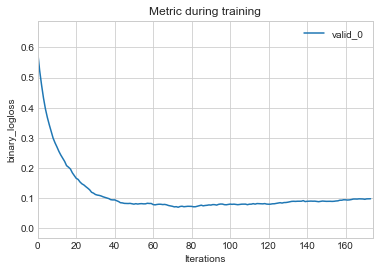

In [66]:
plot_metric(lgbmc);

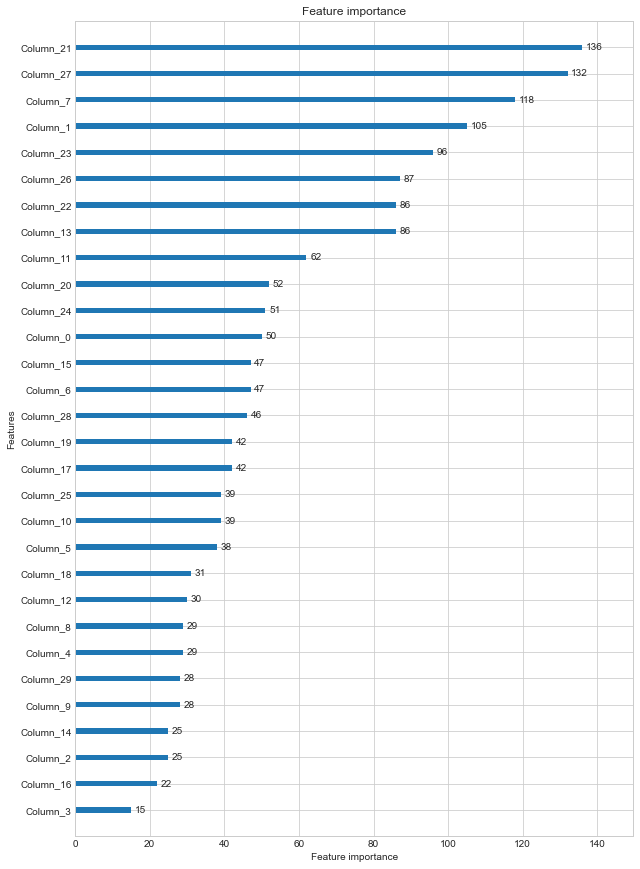

In [69]:
plot_importance(lgbmc, figsize=(10,15));

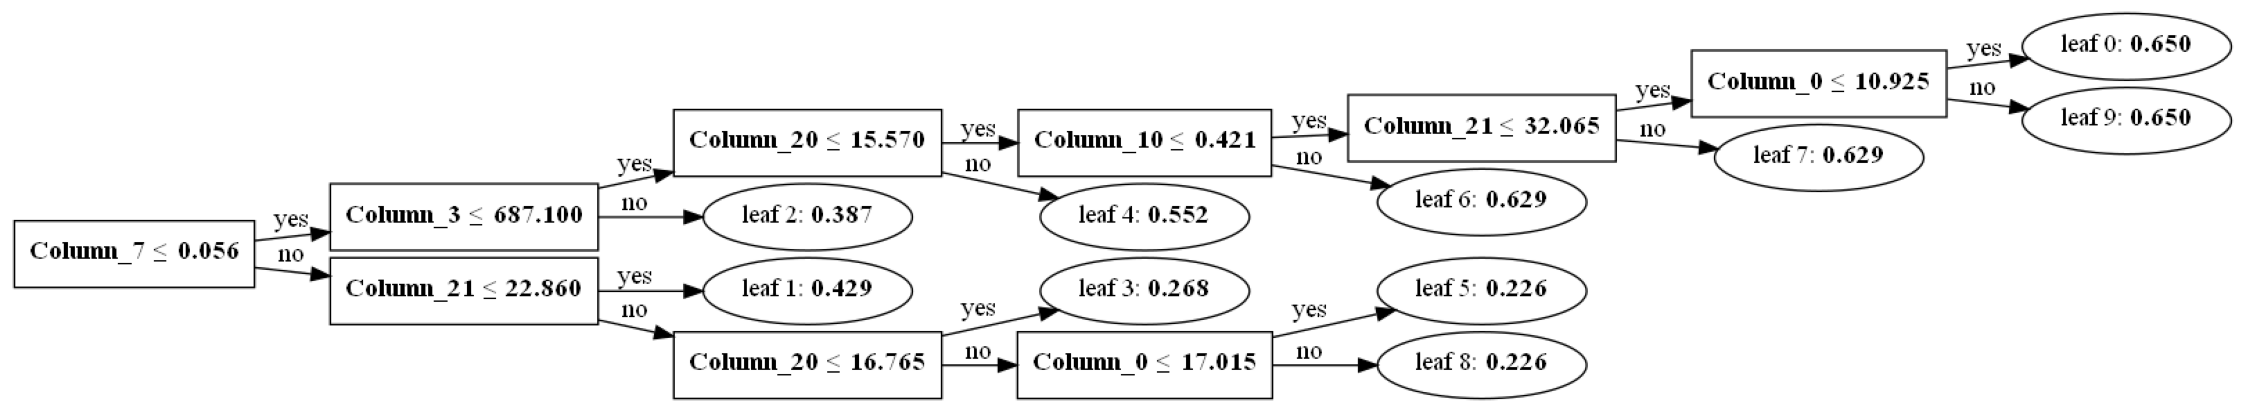

In [73]:
plot_tree(lgbmc, figsize=(40,40));

## LGBMRegressor

### 보스턴 데이터

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = .2, random_state = 123)

In [74]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 0.198045
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.168732
[3]	valid_0's l2: 0.146418
[4]	valid_0's l2: 0.127096
[5]	valid_0's l2: 0.11132
[6]	valid_0's l2: 0.101051
[7]	valid_0's l2: 0.0901555
[8]	valid_0's l2: 0.0827947
[9]	valid_0's l2: 0.0758408
[10]	valid_0's l2: 0.0702511
[11]	valid_0's l2: 0.0658162
[12]	valid_0's l2: 0.0619738
[13]	valid_0's l2: 0.0579699
[14]	valid_0's l2: 0.0538222
[15]	valid_0's l2: 0.0521684
[16]	valid_0's l2: 0.0492189
[17]	valid_0's l2: 0.0478204
[18]	valid_0's l2: 0.0469419
[19]	valid_0's l2: 0.046409
[20]	valid_0's l2: 0.0459247
[21]	valid_0's l2: 0.0452053
[22]	valid_0's l2: 0.0441608
[23]	valid_0's l2: 0.0432216
[24]	valid_0's l2: 0.0418838
[25]	valid_0's l2: 0.040199
[26]	valid_0's l2: 0.0390777
[27]	valid_0's l2: 0.0387951
[28]	valid_0's l2: 0.0379899
[29]	valid_0's l2: 0.0369167
[30]	valid_0's l2: 0.0359685
[31]	valid_0's l2: 0.0360372
[32]	valid_0's l2: 0.0357355
[33]	valid_0's l2: 0.0355584

In [75]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/-){}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std))
print('avg score time : {} (+/-){}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std))
print('avg test score : {} (+/-){}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std))

avg fit time : 0.33607091903686526 (+/-)<built-in method std of numpy.ndarray object at 0x00000203875A3210>
avg score time : 0.004447364807128906 (+/-)<built-in method std of numpy.ndarray object at 0x00000203878F9690>
avg test score : 0.5692468252571979 (+/-)<built-in method std of numpy.ndarray object at 0x000002038791DF90>


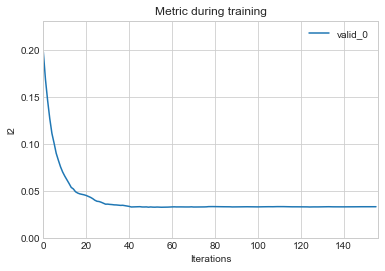

In [76]:
plot_metric(lgbmr);

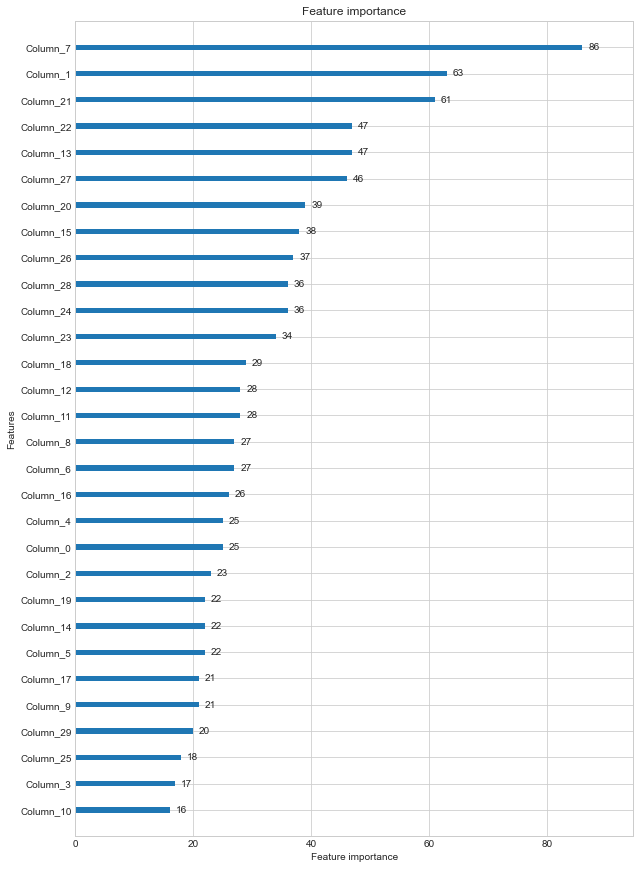

In [77]:
plot_importance(lgbmr, figsize=(10,15));

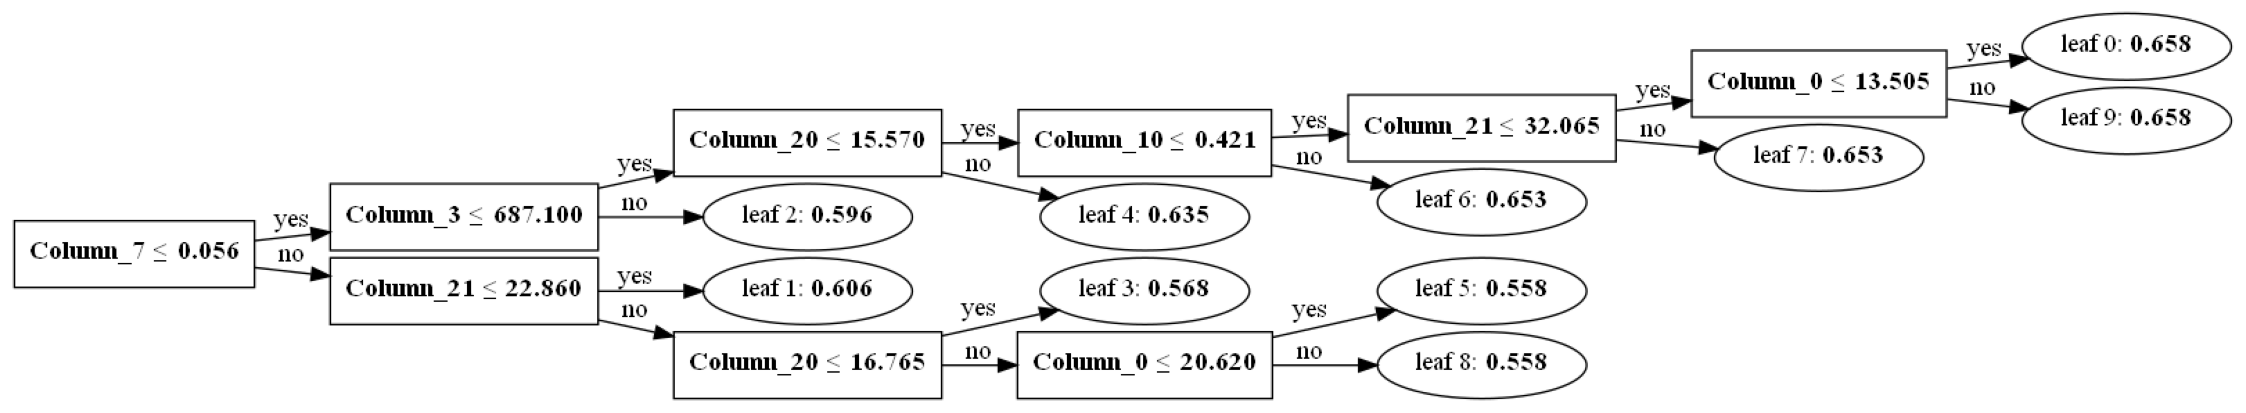

In [79]:
plot_tree(lgbmr, figsize=(40,40));